# MA124 Maths by Computer: Assignment 1

Student number: 2106983

---


In [1]:
# Import standard libraries

import numpy as np
import matplotlib.pyplot as plt

---

## A. Taylor series approximations

One can approximate $\sin(x)$ using a finite number of terms of a Taylor series:

$$
\sin(x) \simeq \sum_{n=0}^N (-1)^n\frac{x^{2n+1}}{(2n+1)!} 
$$

One can also approximate the natural logarithm $\ln(1+x)$ using a finite number of terms of a Taylor series:

$$
\log(1+x) \simeq \sum_{n=1}^N (-1)^{n+1} \frac{x^n}{n}
$$

In this notebook we will explore these approximations, in particular how they depend on $N$. 





In [2]:
# Functions to compute Taylor series approximations for sine and logarithm

def sin_approx(x,N):
    '''approximates sin at x'''
    total=0*x
    for i in range(N+1):
        total+=(-1)**i*((x)**(2*i+1)/np.math.factorial(2*i+1))
    return(total)

def log_approx(x,N):
    '''approximates log(1+x) at x'''
    total=0*x
    for i in range(1,N+1):
        total+=(-1)**(i+1)*x**i/i
    return(total)

---

The figure below shows the taylor series approximations of sin for varying N, along with the true sine curve


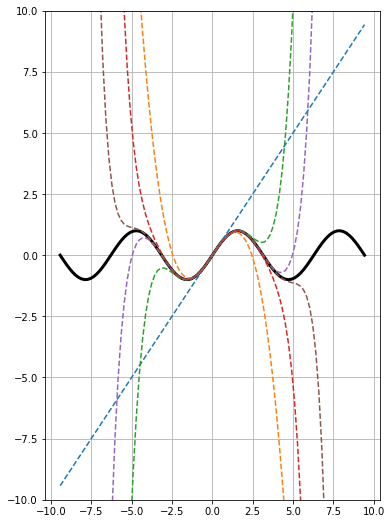

In [3]:
# Generate plots comparing exact and Taylor approximations for sine

# Set the range of x
x=np.linspace(-3*np.pi,3*np.pi,101)

# Set the size of the plot
plt.figure(figsize=(6,9))

# Plot the true sine curve, in black and with a thicker line
plt.plot(x,np.sin(x),'k', lw=3)

# Plot the series approximations for varying N
for i in range(6):
    plt.plot(x,sin_approx(x,i),'--')

# Change the vertical plot limits and add a grid for aesthetics    
plt.ylim(-10,10) 
plt.grid(True)
plt.show()

---

The figure below shows the taylor series approximations of log(1+x) for varying N, along with the true log curve

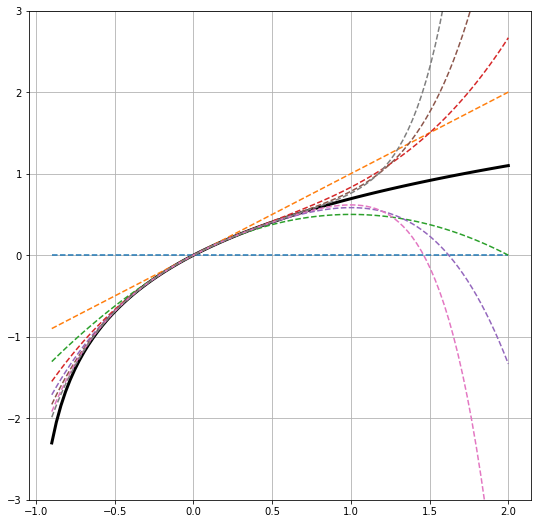

In [4]:
# Generate plots comparing exact and Taylor approximations for the natural logarithm 

# Set the range of x
x=np.linspace(-0.9,2,101)

# Set the size of the plot
plt.figure(figsize=(9,9))

# Plot the true log curve, in black and with a thicker line
plt.plot(x,np.log(1+x),'k', lw=3)

# Plot the series approximations for varying N
for i in range(8):
    plt.plot(x,log_approx(x,i),'--')

# Change the vertical plot limits and add a grid for aesthetics    
plt.ylim(-3,3) 
plt.grid(True)
plt.show()

---

### Error plots (Challenge section)





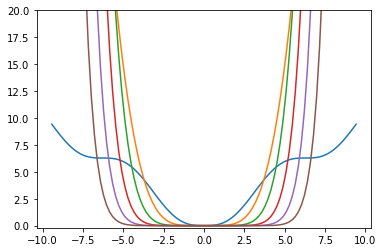

In [5]:
# Set the range of x
x=np.linspace(-3*np.pi,3*np.pi,101)

# Plot the error of the approximations for varying N
for i in range(6):
    plt.plot(x,abs(np.sin(x)-sin_approx(x,i)))

# Change vertical plot limits   
plt.ylim(-0.2,20)
plt.show()

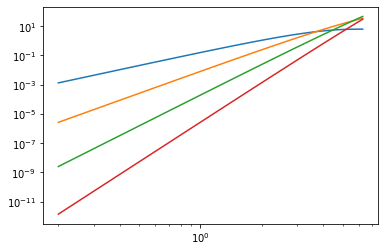

In [6]:
# Set the new range of x
x=np.linspace(0.2,2*np.pi,101)

# Plot, using log-log, the error of the approximations for varying N
for i in range(4):
    plt.loglog(x,abs(np.sin(x)-sin_approx(x,i)))
    
plt.show()

On the first plot, you can see that at very low y values (which means very low error), it's clear to see that as N increases, the range of x for which the error is very low increases, as you'd expect. Interestingly, the error for N=0, increases signicantly less than for N>0. So while larger values of N have a wider range where it's a close approximation, when they stop being a close approximation the error rises dramatically.

On the second plot, what we concluded from the first plot is shown again. For N not equal to, the lines are almost straight which means that the logarithmic scale increases proportionally, indicating a near constant power relationship. However, for N equal to 0 there is a point where the logarithmic scale starts decreasing indicating the error is not increasing as dramatically.

---
## B. Parametric roller coaster

Here we present an original design for a parametric roller coaster. 


---

In [7]:
# Section 1 is the flat start, where it goes side to side as a sine curve in the x,y plane
t1=np.linspace(-6,0,101)
x1=t1
y1=np.sin(t1*np.pi) 
z1=0*t1
print((x1[0],y1[0],z1[0]),(x1[-1],y1[-1],z1[-1]))

(-6.0, 7.347880794884119e-16, -0.0) (0.0, 0.0, 0.0)


In [8]:
# Section 2 is a helix that "rises" (z value increases)
t2=np.linspace(0,6,101)
x2=np.sin(t2*np.pi)
y2=np.cos(t2*np.pi)-1
z2=t2
print((x2[0],y2[0],z2[0]),(x2[-1],y2[-1],z2[-1]))

(0.0, 0.0, 0.0) (-7.347880794884119e-16, 0.0, 6.0)


In [9]:
# Section 3 is a straight section from the end of the helix, moving in the positive y direction
t3=np.linspace(6,10,101)
x3=0*t3
y3=t3-6
z3=6+0*t3
print((x3[0],y3[0],z3[0]),(x3[-1],y3[-1],z3[-1]))

(0.0, 0.0, 6.0) (0.0, 4.0, 6.0)


In [10]:
# Section 4 is a parabola such that it rises to a peak and then has a very sharp drop back to level with the start of the rollercoaster in the (x,y) plane
t4=np.linspace(0,2,101)
x4=-t4
y4=4+0*t4
z4=-5*t4**2+7*t4+6
print((x4[0],y4[0],z4[0]),(x4[-1],y4[-1],z4[-1]))

(-0.0, 4.0, 6.0) (-2.0, 4.0, 0.0)


In [11]:
# Section 5 is similar to section 1 in that it moves in the x,y plane as a sine curve
t5=np.linspace(2,6,101)
x5=-t5
y5=np.sin(-t5*np.pi)+4
z5=0*t5
print((x5[0],y5[0],z5[0]),(x5[-1],y5[-1],z5[-1]))

(-2.0, 4.0, 0.0) (-6.0, 4.000000000000001, 0.0)


In [12]:
# Section 6 is a simple circular arc (semi-circle) bringing you back to the start of the rollercoaster
t6=np.linspace(0.5,1.5,101)
x6=2*np.cos(t6*np.pi)-6
y6=2*np.sin(t6*np.pi)+2
z6=0*t6
print((x6[0],y6[0],z6[0]),(x6[-1],y6[-1],z6[-1]))

(-6.0, 4.0, 0.0) (-6.0, 0.0, 0.0)


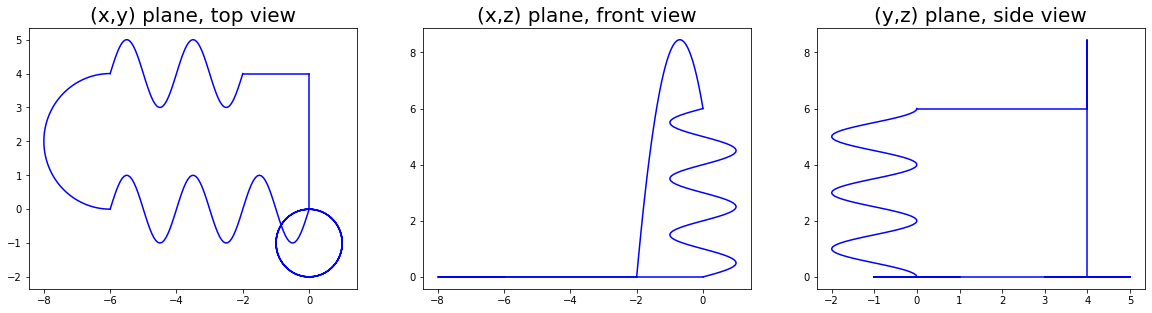

In [13]:
# Now, to plot it in 3 separate viewpoints: the planes (x,y), (x,z) and (y,z)

# Plot it first in (x,y) plane. Note: it is not self-intersecting even though this plot may suggest so, because the value where the circle intersects in (x,y) plane have positive z values.
plt.figure(figsize=(20,4.8))
plt.subplot(131)
plt.plot(x1,y1,'b')
plt.plot(x2,y2,'b')
plt.plot(x3,y3,'b')
plt.plot(x4,y4,'b')
plt.plot(x5,y5,'b')
plt.plot(x6,y6,'b')
plt.title("(x,y) plane, top view", fontsize=20)

# Next to plot it in (x,z) plane
plt.subplot(132)
plt.plot(x1,z1,'b')
plt.plot(x2,z2,'b')
plt.plot(x3,z3,'b')
plt.plot(x4,z4,'b')
plt.plot(x5,z5,'b')
plt.plot(x6,z6,'b')
plt.title("(x,z) plane, front view", fontsize=20)

# Finally, plotting it in (y,z) plane
plt.subplot(133)
plt.plot(y1,z1,'b')
plt.plot(y2,z2,'b')
plt.plot(y3,z3,'b')
plt.plot(y4,z4,'b')
plt.plot(y5,z5,'b')
plt.plot(y6,z6,'b')
plt.title("(y,z) plane, side view", fontsize=20)
plt.show()

